# Food Recommender System

# Introduction
The increasing awareness of health and nutrition has led to a growing demand for personalized dietary recommendations. With the vast array of food options and complex nutritional guidelines, individuals often find it challenging to make informed choices that align with their health goals and dietary preferences. A food recommender system emerges as a powerful tool to address this challenge, leveraging data and machine learning to provide personalized food and meal suggestions. Such systems can help users navigate the complexities of nutrition and diet planning, encouraging healthier eating habits and improving overall wellness.

In our fast-paced digital age, we're inundated with vast amounts of data, offering a wealth of information at our fingertips. Yet, sifting through this sea of data to find relevant information tailored to our specific interests and needs can be daunting. This is where recommendation systems come into play, serving as a navigational tool to guide users through the information overload towards their desired outcomes.

Recommendation systems are designed to establish a connection between users and items by identifying similarities among them. This connection is then leveraged to predict and suggest items a user might find appealing.


Aim
The aim of this project is to develop a personalized food recommender system that assists users in making healthier food choices, based on their individual dietary needs, preferences, health objectives, and restrictions. The system will offer tailored recommendations for meals and foods, helping users achieve a balanced diet that supports their overall health and wellness goals.

Objectives
To achieve this aim, the project will focus on several key objectives:

Develop a User Profile Module:
To collect and manage detailed user information, including dietary preferences, health goals, and nutritional requirements.
Integrate a Comprehensive Nutritional Database:
To utilize a rich database of foods and their nutritional content, serving as the foundation for generating accurate recommendations.
Implement a Sophisticated Recommendation Engine:
To employ machine learning algorithms for analyzing user profiles and matching them with suitable food options, ensuring recommendations are personalized and relevant.
Create an Interactive User Interface:
To design an engaging and intuitive interface that allows users to easily input their preferences, interact with recommendations, and track their dietary habits.
Incorporate a Feedback Mechanism:
To enable users to rate recommendations and provide feedback, facilitating continuous improvement of the recommendation engine through adaptive learning.
Ensure Compliance with Dietary Guidelines:
To align the recommendations with established dietary guidelines and nutritional best practices, ensuring healthful advice.
Foster Educational Engagement:
To offer educational resources and insights about nutrition and healthy eating, empowering users with knowledge to make informed dietary decisions.

In today's digital age, we find ourselves submerged in an ocean of data, which, while rich in information, presents a daunting challenge for users attempting to sift through it to find what truly matters to them. Recommendation systems emerged as a beacon of guidance in this complex landscape, ingeniously navigating the user through the clutter to discover products and information aligned with their interests.

Recommendation systems ingeniously bridge the gap between users and products by identifying and leveraging similarities in user preferences and item characteristics. These systems serve a multitude of purposes:

They streamline the search process, enabling users to discover the right products efficiently.
They enhance user engagement, as evidenced by a 40% increase in clicks on Google News, fueled by tailored recommendations.
They support item providers by accurately targeting and delivering products to the appropriate audience, a strategy that accounts for 35% of Amazon's product sales.
They offer personalized content, significantly contributing to user satisfaction on platforms like Netflix, where recommendations drive the majority of movie rentals.
In the realm of nutrition and dietary advice, the scenario is no less complex. The internet is awash with apps, videos, and articles prescribing what to eat and what to avoid. However, the abundance of this information rather than clarifying, often muddies the waters for the public. With conflicting advice and dubious sources, users find themselves at a crossroads, unsure of whom to trust or what guidelines to follow. This confusion, exacerbated by sometimes misleading information, can have direct consequences on an individual's health and well-being.

Recognizing the critical need for reliable and personalized dietary recommendations, our project aims to cut through this noise, providing clear, trustworthy, and scientifically-backed advice tailored to individual dietary needs and preferences. By developing a sophisticated food recommender system, we seek to eliminate the confusion and risk of misinformation, guiding users towards healthier eating habits and, ultimately, fostering better health outcomes. This initiative not only aims to empower users with accurate and personalized dietary insights but also to set a new standard in dietary guidance, making it more accessible, reliable, and conducive to a healthy lifestyle.


How Can a Food Recommender System Make a Difference?
Facilitate Nutritional Choices: Just as recommendation systems help users find the right products, a food recommender system can guide individuals towards healthier eating choices, making it simpler to identify foods that align with their dietary goals and preferences.
Enhance User Engagement: Similar to the 40% increase in clicks observed on Google News due to recommendations, a food recommender system can significantly boost user engagement by providing personalized food suggestions, leading to a more active and involved user base.
Match Dietary Needs with Suitable Foods: As Amazon sees a 35% increase in product sales through recommendations, a food recommender system can adeptly connect users with the right dietary options. This ensures that individuals receive tailored food suggestions that not only cater to their nutritional requirements but also support their overall well-being.
Personalization of Dietary Plans: Echoing Netflix's success, where most rented movies stem from recommendations, a food recommender system can transform the way users approach their diet. By offering personalized meal and food suggestions, it brings a new level of customization to dietary planning, making it easier for users to follow a balanced and nutritious diet tailored specifically to their needs.
In essence, a food recommender system transcends traditional information retrieval methods by providing a curated, personalized experience that aids users in navigating the complexities of nutrition and dietary choices. This not only enhances user satisfaction and engagement but also promotes healthier lifestyle choices, thereby contributing to the well-being of individuals in a meaningful way.

Recommendation systems can be classified into six main types. Popularity-based systems recommend items that are popular among most users. Classification model-based systems use user characteristics and classification algorithms to predict interest in products. Content-based recommendations suggest items similar to those a user has previously liked, focusing on item content. Collaborative filtering assumes users will like items similar to what they've liked before or items liked by users with similar tastes. Hybrid approaches combine multiple recommendation strategies. Association rule mining identifies relationships between items based on their co-occurrence in transactions.

Here I am considering the hybrid approach might be the most effective, as the food recommender system focused on nutritional advice and diet balancing,. This method combines content-based recommendations, which can suggest foods based on their nutritional content and similarity to user preferences, with collaborative filtering, to leverage patterns in user behavior and preferences. Incorporating classification models could help predict whether a user would like a suggested item based on their dietary goals. This multifaceted strategy allows for personalized, accurate, and comprehensive food recommendations.

In [183]:
!pip3 install Flask
!pip3 install spacy


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Loading Necessary Libraries

In [434]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

import spacy
import string
import networkx as nx
import unicodedata

## Loding Data

In [435]:
file_path = 'FoodIngredientsandRecipe.csv'
print(f'File is {os.path.getsize(file_path)/1_000_000:.2f} MB')

File is 20.89 MB


In [436]:
df = pd.read_csv(file_path, index_col=0)

df.head()

,Title,Ingredients,Instructions,Image_Name
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail


In [470]:
# Re-indexing DataFrame to start from 1 instead of 0
df.index = range(1, len(df) + 1)

# Renaming the index to 'recipe_id'
df.index.name = 'Recipe_id'
# Verify the changes
df.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
Recipe_id,,,,,
1,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella,"ground, , onion, allspice, thinly, wine, apple cider vinegar, pepper, black pepper, flour, red ..."
2,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger,"potatoes, salt, black pepper, egg, parsley, whites, thyme"
3,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams,"paprika, salt, onion, , black pepper, cheese, macaroni, milk, cheddar, coarsely, cream, elbow"
4,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559,"giblet, , ceramic, -qt, reggiano, coarsely, ribs, leaf, onions, turkey, casings, sodium, stock,..."
5,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail,"water, , twist, bourbon, sugar, storebought, orange, butter, cinnamon, apple, lemon juice"


NLTK Library
NLTK (Natural Language Toolkit) is one of the leading platforms for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

The download() Function
The download() function in NLTK is used to download specific datasets or models. In your example, two sets of data are being downloaded: punkt and averaged_perceptron_tagger.

1. nltk.download('punkt')
Purpose: This downloads the "Punkt Sentence Tokenizer". This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. It must be trained on a large collection of plaintext in the target language before it can be used.

Usage: The Punkt tokenizer is used to split text into sentences. This is especially useful for texts that don't have clear sentence boundaries.

In [438]:
# Ensure to have NLTK data downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjoth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mjoth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [440]:
# diplaying titles of our dataframe
titles = df['Title']
titles.head(10)

1     Miso-Butter Roast Chicken With Acorn Squash Panzanella
2                            Crispy Salt and Pepper Potatoes
3                                Thanksgiving Mac and Cheese
4                         Italian Sausage and Bread Stuffing
5                                               Newton's Law
6                                               Warm Comfort
7                                         Apples and Oranges
8                                         Turmeric Hot Toddy
9                                    Instant Pot Lamb Haleem
10            Spiced Lentil and Caramelized Onion Baked Eggs
Name: Title, dtype: object

The code titles extracts the 'Title' column from the DataFrame df and assigns it to the variable titles, then displays the first 10 entries of this column.

In [215]:
# For printing thting missing and descriptive statistics
print(f'Count including NaNs: {len(titles)}')
print(titles.describe())

Count including NaNs: 13501
count             13496
unique            13305
top       Potato Latkes
freq                  5
Name: Title, dtype: object


The code prints the total count of entries including NaN values in the 'titles' series and provides a statistical summary (like count of non-null entries, unique values, top occurrence, and frequency) of the data. The output shows that the 'Title' series has 13,501 entries including NaN values, with 13,496 non-null entries, 13,305 unique titles, the most frequent title being 'Potato Latkes' appearing five times.

In [216]:
print("Title lengths:")
lengths = titles.str.len()
print(lengths.describe())

Title lengths:
count    13496.000000
mean        32.761633
std         14.756405
min          3.000000
25%         21.000000
50%         31.000000
75%         43.000000
max        112.000000
Name: Title, dtype: float64



The output provides statistical data on the lengths of the 'Title' entries: it includes measures such as mean title length (32.76 characters), standard deviation (14.76 characters), and various percentiles, indicating the distribution of title lengths from a minimum of 3 characters to a maximum of 112 characters across 13,496 non-null titles.

In [441]:
# Check null values
print(f'Null value count: {titles.isnull().sum()}')

# Dropping null values
titles.dropna(inplace=True)

Null value count: 5


The first line of the code calculates and prints the number of null (missing) values in the titles series. The second line permanently removes all entries from titles that contain null values, updating the series in-place to contain only non-null entries.

In [442]:
#check null values after dropping
print(f'Null value count: {titles.isnull().sum()}')

df['Title'].describe()

Null value count: 0


count             13496
unique            13305
top       Potato Latkes
freq                  5
Name: Title, dtype: object

In [443]:
# Enumerate characters
chars = set()

for title in titles:
    for char in title:
        chars.add(char)

chars = sorted(chars)
# printing the uniques characters appeared in the recipe titles
print(f'Unique characters: {len(chars)}')
print(''.join(chars))

Unique characters: 136

 !"#%&'()+,-./012345679:;ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz ®ÁÉàáâãäçèéêëìíîïñòóôöøùúûüōờ́̃̉Сикнры –—‘’“”강개닭된장전정찌파



The code snippet iterates over each title in the titles series, collecting every unique character across all titles into the set chars, which inherently removes any duplicates. After sorting these unique characters, it prints the total number of unique characters found and displays them as a concatenated string.

In [446]:
# Describe unexpected characters
pd.options.display.max_colwidth = 100
expected_chars = string.ascii_letters + string.digits + ' ' + '!"#%&\'(),-.:? ®ÁÉàáâãäçèéêëìíîïñòóôöøùúûüōờ́̃̉Сикнры –—‘’“”강개닭된장전정찌파'
unexpected_chars = [char for char in chars if char not in expected_chars]

for char in unexpected_chars:
    char_name = ('<control>' if (unicodedata.category(char) == 'Cc') else
        unicodedata.name(char))
    print(f'Unexpected character: {char_name}')
    titles_containing_char = titles[titles.str.contains(char, regex=False)]
    print(f'Titles containing char: {len(titles_containing_char)}')
    titles_containing_char.head()

Unexpected character: <control>
Titles containing char: 3
Unexpected character: PLUS SIGN
Titles containing char: 2
Unexpected character: SOLIDUS
Titles containing char: 6
Unexpected character: SEMICOLON
Titles containing char: 2
Unexpected character: NO-BREAK SPACE
Titles containing char: 2


The script identifies and analyzes unexpected characters in the titles of a dataset, defining characters expected in the dataset and highlighting any anomalies. It utilizes unicodedata.name() to describe non-alphanumeric characters and counts their occurrences in the titles. The output reveals characters like control characters, plus signs, and no-break spaces, indicating their presence and frequency. This process is essential for data cleaning and standardization, ensuring the textual data is free of encoding errors or misformatted entries before further processing or analysis.

The output displays a frequency count of various descriptors and conditions of ingredients used in a collection of recipes. The most common entries include terms like "divided," "chopped," and "peeled," which appear to denote preparation methods, with "divided" leading at 3817 occurrences. Additionally, seasonings like "Kosher salt" and "freshly ground pepper" are frequently noted, indicating their essential role in flavoring dishes.

### Step 1: Data Preprocessing
To extract the main ingredients using NLP, we have to follow these steps:

**Clean the text:** Initially, I'll preprocess the text by removing any irrelevant information such as special characters, numbers, and measurements, ensuring that only the text relevant to ingredients remains.

**Tokenize the text:** Following cleaning, I'll tokenize the preprocessed text, splitting it into individual words or tokens. This step is essential for further analysis as it breaks down the text into manageable units.

**Identify ingredient tokens:** Leveraging NLP techniques like part-of-speech tagging and named entity recognition, I'll identify tokens within the text that likely represent ingredients. This process helps distinguish ingredient-related terms from other text components.

**Filter out non-ingredient tokens:** Once we've identified potential ingredient tokens, I'll filter out any non-ingredient tokens, including measurements, descriptors, and punctuation. This refinement ensures that we're left with only the terms directly related to ingredients.

**Determine main ingredients:** With the remaining tokens, I'll analyze their frequency or relevance within the context of the text to determine the main ingredients. By examining factors like token frequency or association with specific recipes, we can identify the key components of the dish.

After doing all these, I will be creating a separate column named Cleaned_Ingredients and will be storing these new ingredient's list.

In [447]:
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from spacy.util import filter_spans

nlp = spacy.load("en_core_web_sm")

multi_word_ingredients = [
    "olive oil", "all purpose flour", "chana dal", "egg white", "unsalted butter", "Red pepper flakes",
    "lemon juice", "cocoa powder", "baking powder", "apple cider vinegar", "allpurpose flour",
    "lime juice", "freshly","Vegetable oil",
    "vanilla extract", "pepper flakes", "unsalted butter","black pepper", "Extravirgin olive oil"
]

# Initializing PhraseMatcher with the shared vocab
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

patterns = [nlp.make_doc(text.lower()) for text in multi_word_ingredients]  # Lowercase the pattern text
matcher.add("MULTI_WORD_INGREDIENTS", patterns)

def clean_ingredients_nlp(ingredient_text):
    ingredient_text = re.sub(r'\b\d+/?\d*\s*|\u00BC|\u00BD|\u00BE|\u2153|\u2154|\u215B', '', ingredient_text)  # Remove numbers, simple fractions, and Unicode fractions
    ingredient_text = re.sub(r'\b(?:tsp|tbsp|cup|cups|pounds?|oz|ounces?|lbs?|g|grams?|mgs?|kgs?|ls?|mls?|quarts?|pints?|gallons?)\b\.?', '', ingredient_text, flags=re.I)
    # ingredient_text = re.sub(r'-', ' ', ingredient_text)

    doc = nlp(ingredient_text.lower())  # Lowercase the input text
    matches = matcher(doc)
    spans = [doc[start:end] for match_id, start, end in matches]
    filtered_spans = filter_spans(spans)  # Filter overlapping spans

    with doc.retokenize() as retokenizer:
        for span in filtered_spans:
            retokenizer.merge(span)

    # Converting list of ingredients to set and back to list to remove duplicates
    unique_ingredients = set(token.text for token in doc if not token.is_stop and not token.is_punct)

    unwanted_pos = {"VERB", "ADJ"}  # Define the part-of-speech tags for verbs
    common_words = ["and", "or", "with", "plus", "as well as", "including", "such as", "of", "for", "to", "a", "an", "the", "and/or"]

    measurements_descriptors = {
        "cup", "cups", "tsp", "kg", "kgs", "teaspoon", "tablespoon", "divided", "chopped",
        "oz", "ounce", "ounces", "pound", "pounds", "g", "tbsp","total", "like","teaspoons",
        "gram", "grams", "ml", "liter", "slice", "slices", "pinch", "powder","tablespoons",
        "dash", "quarter", "half", "temperature", "lb", "tmp", "room", "white","freshly",
        "inch", "diameter", "large", "small", "medium", "hot", "cold", "warm",
        "new", "old", "ripe", "fresh", "dry", "sweet", "melted", "finely", "chopped"
    }
    cleaned_ingredients = [token.text for token in doc 
                           if token.pos_ not in unwanted_pos
                           and token.text not in common_words
                           and token.text not in measurements_descriptors
                           and not token.is_punct
                           and not token.is_stop]
    
    # Removing duplicates and adjectives
    cleaned_ingredients = list(set(cleaned_ingredients))
    
    return ", ".join(cleaned_ingredients)

# Cleaning the Ingredients
df['Cleaned_Ingredients'] = df['Ingredients'].apply(clean_ingredients_nlp)
df['Cleaned_Ingredients'].head(20)

1     ground,  , onion, allspice, thinly, wine, apple cider vinegar, pepper, black pepper, flour, red ...
2                                               potatoes, salt, black pepper, egg, parsley, whites, thyme
3          paprika, salt, onion,  , black pepper, cheese, macaroni, milk, cheddar, coarsely, cream, elbow
4     giblet,  , ceramic, -qt, reggiano, coarsely, ribs, leaf, onions, turkey, casings, sodium, stock,...
5              water,  , twist, bourbon, sugar, storebought, orange, butter, cinnamon, apple, lemon juice
6                                                    nectar, tea,  , bags, lemon juice, tequila, reposado
7         sweetness,  , cider, wheels, lemon, pat, amaro, peppercorns, butter, averna, apple, lemon juice
8     amontillado, ground,  , sherry, wheel, turmeric, lemon juice, bourbon, lemon, sugar, gin, syrup,...
9     ground,  , onion, dal, thinly, pepper, masala, shallots, moong, grain, meat, urad, bone, thai, l...
10    tomato,  , onion, thinly, lentil, pepper

Finally, the ingredients have been cleaned and stored in the new column Cleaned_Ingredients.

In [452]:
# Assuming 'ingredients' is your list of ingredient strings
cleaned_ingredients = []

for ingredient_list in df['Cleaned_Ingredients']:
    # Split the string into individual ingredients, remove extra whitespace and empty elements
    ingredients_split = [ingredient.strip() for ingredient in ingredient_list.split(',') if ingredient.strip()]
    cleaned_ingredients.append(ingredients_split)


# More rigorous cleaning
def clean_ingredient_list(ingredient_list):
    ingredients = []
    for ingredient in ingredient_list.split(','):
        cleaned_ingredient = ingredient.strip()
        # Add the cleaned ingredient if it is not empty and not just a comma
        if cleaned_ingredient and cleaned_ingredient != ',':
            ingredients.append(cleaned_ingredient)
    return ingredients

# Apply the cleaning function to each ingredient list in your data
cleaned_ingredients = [clean_ingredient_list(ingredient_list) for ingredient_list in df['Cleaned_Ingredients']]
cleaned_ingredients[1:3]

[['potatoes', 'salt', 'black pepper', 'egg', 'parsley', 'whites', 'thyme'],
 ['paprika',
  'salt',
  'onion',
  'black pepper',
  'cheese',
  'macaroni',
  'milk',
  'cheddar',
  'coarsely',
  'cream',
  'elbow']]

The code snippet processes a DataFrame column named 'Cleaned_Ingredients', which contains lists of ingredients as comma-separated strings. Each ingredient list is first split by commas, and extraneous spaces and empty values are removed to ensure only meaningful ingredient names are retained. The output displays two lists of cleaned ingredients for the second and third recipes in the DataFrame, showing well-formatted and distinct ingredient entries without any redundant characters or white spaces.

In [456]:
# Tokenize the cleaned ingredients to extract main ingredients
main_ingredients = df['Cleaned_Ingredients'].str.split(',').explode().str.strip().value_counts()

print("Main ingredients in ")
main_ingredients.head(10)

Main ingredients in 


Cleaned_Ingredients
salt               9002
olive oil          4927
sugar              4813
unsalted butter    3357
black pepper       3156
cloves             2950
ground             2895
thinly             2497
cream              2404
onion              2371
Name: count, dtype: int64

The output presents a frequency distribution of the top ten ingredients from the 'Cleaned_Ingredients' column of a DataFrame, where 'salt' is the most common ingredient, appearing 9,002 times, followed by 'olive oil' and 'sugar' with 4,927 and 4,813 occurrences, respectively. Other ingredients like 'unsalted butter', 'black pepper', and 'cloves' also feature prominently, indicating their frequent use across the recipes in the dataset. This summary helps in understanding the most prevalent ingredients in the culinary data being analyzed.

In [460]:
# This line creates a Series with ingredients as the index and their counts as the values
main_ingredients = df['Cleaned_Ingredients'].str.split(',').explode().str.strip().value_counts()

# Convert the Series to a dictionary
ingredients_dict = main_ingredients.to_dict()

# Now ingredients_dict is a dictionary where the keys are ingredients and values are their counts
top_ingredients = dict(sorted(ingredients_dict.items(), key=lambda item: item[1], reverse=True)[:50])
top_ingredients

{'salt': 9002,
 'olive oil': 4927,
 'sugar': 4813,
 'unsalted butter': 3357,
 'black pepper': 3156,
 'cloves': 2950,
 'ground': 2895,
 'thinly': 2497,
 'cream': 2404,
 'onion': 2371,
 'water': 2359,
 '': 2304,
 'flour': 2289,
 '-inch': 2172,
 'pepper': 2153,
 'vinegar': 2081,
 'pieces': 2074,
 'lemon juice': 2027,
 'eggs': 2014,
 'vegetable oil': 1948,
 'leaves': 1945,
 'milk': 1887,
 'wine': 1877,
 'coarsely': 1773,
 'purpose': 1752,
 'lemon': 1738,
 'chicken': 1729,
 'egg': 1644,
 'seeds': 1598,
 'parsley': 1598,
 'sauce': 1585,
 'cheese': 1579,
 'stick': 1471,
 'oil': 1358,
 'tomatoes': 1279,
 'sea': 1274,
 'ginger': 1247,
 'juice': 1204,
 'butter': 1180,
 'vanilla extract': 1162,
 'rice': 1145,
 'cilantro': 1122,
 'zest': 1113,
 'lengthwise': 1102,
 'preferably': 1088,
 'thyme': 1078,
 'broth': 1061,
 'cinnamon': 1019,
 'onions': 980,
 'cubes': 960}

The process involves splitting each entry on commas, "exploding" the resulting lists into separate rows (one per ingredient), and stripping whitespace. Finally, the dictionary is sorted by these counts in descending order, and the top 50 most frequent ingredients are selected and displayed. The output shows these top ingredients along with their respective counts, highlighting common items like 'salt', 'olive oil', and 'sugar'.

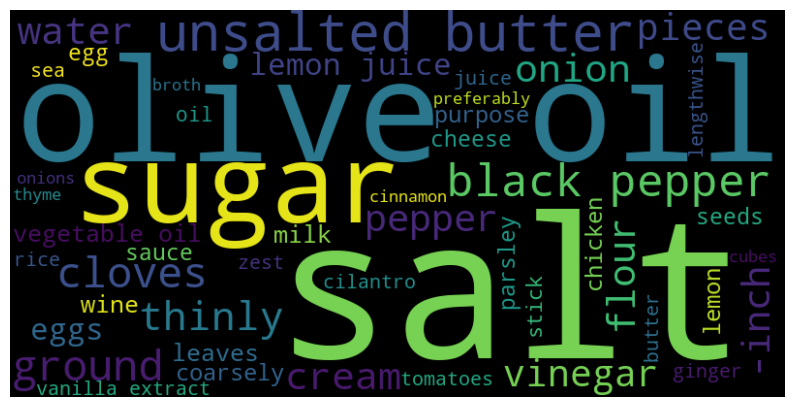

In [461]:
from wordcloud import WordCloud

# Create a dictionary of word frequencies
word_freq = {'soy sauce': 10, 'ginger': 5, 'fish': 7}
titles_dict = titles.to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(top_ingredients)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The graph displays a word cloud based on the frequencies of ingredients, visually emphasizing the most common ingredients by making them appear larger than less common ones.

In [462]:
# To check 'top_ingredients' is not empty and has the data you expect
if not top_ingredients:
    raise ValueError("The 'top_ingredients' dictionary is empty.")

# Creating the graph
G = nx.Graph()

# Adding nodes and possibly edges to the graph
for ingredient, count in top_ingredients.items():
    # To check count is not None or zero
    if count is None or count == 0:
        continue
    G.add_node(ingredient, size=count)

# To Check if there are nodes in the graph
if not G.nodes():
    raise ValueError("No nodes in the graph to display.")

# Extract size attributes and multiply by a factor to scale up node sizes for visibility
sizes = [G.nodes[node]['size'] * 100 for node in G]  # Adjust the 100 factor as necessary


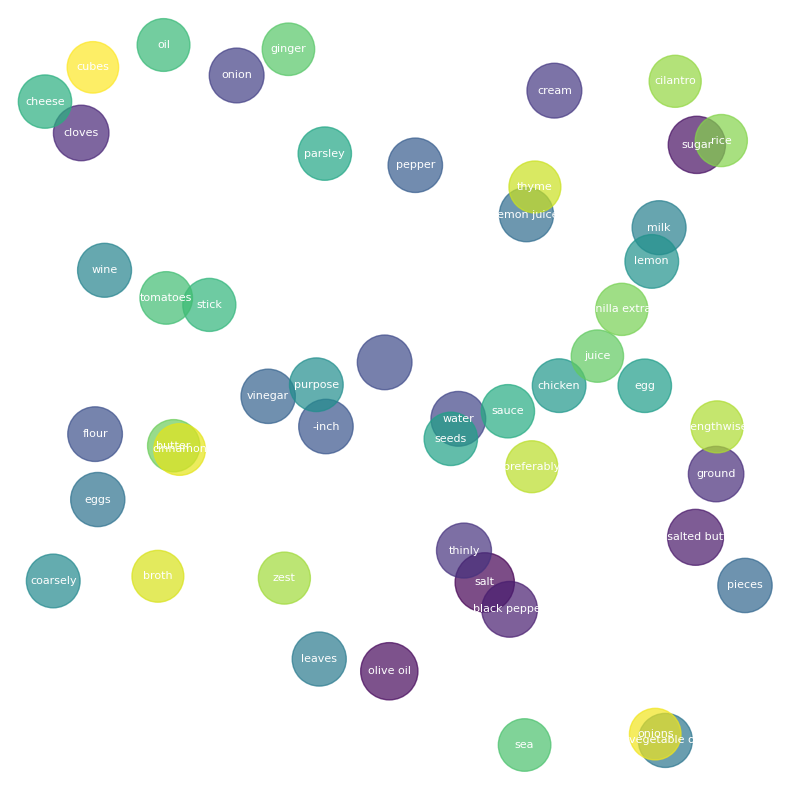

In [463]:
# Adding nodes to the graph with the size attribute from 'top_ingredients'
for ingredient, freq in top_ingredients.items():
    G.add_node(ingredient, size=freq)

# Define positions for each node using a layout algorithm
pos = nx.random_layout(G)

# Draw the graph
plt.figure(figsize=(8, 8))  # Set the size of the graph

# Calculate sizes for drawing
min_size = 200  # Minimum size of node
# Using a size function, e.g., logarithmic, to ensure size variation
sizes = [np.log(G.nodes[node]['size']+1) * min_size for node in G]

# Calculate a color map based on the size of the nodes
# Normalize the node sizes to determine the color
colors = plt.cm.viridis(np.linspace(0, 1, len(G.nodes())))

# Draw nodes with sizes and colors
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, alpha=0.7)

# Draw edges - if you have edges data, include them here
# nx.draw_networkx_edges(G, pos, width=1)

# Draw labels for each node
nx.draw_networkx_labels(G, pos, font_size=8, font_color='white')

plt.axis('off')  # Turn off the axis
plt.tight_layout()  # Tight layout often looks better
plt.show()


This visualization represents a network graph of ingredients, where each node's size is proportional to the frequency of that ingredient in the dataset. The nodes are positioned randomly, colored using a gradient to reflect their distribution, and labeled with ingredient names for identification. The graph shows key ingredients like 'salt', 'olive oil', and 'black pepper' as larger nodes due to their higher occurrence, set against a variety of other ingredients, creating a colorful mosaic of culinary components.

In [465]:
# Split each row on the comma to get individual ingredients and then use explode to create a row for each ingredient.
ingredients_series = df['Cleaned_Ingredients'].str.split(', ')

# Aggregate ingredients into a list for each recipe
unique_ingredients_per_recipe = ingredients_series.apply(lambda x: ', '.join(set(x)))

# Create a DataFrame with recipe IDs and unique ingredients
unique_ingredients_df = pd.DataFrame({'Title': df['Title'], 'Unique_Ingredients': unique_ingredients_per_recipe})

# Display the DataFrame
unique_ingredients_df.head()


,Title,Unique_Ingredients
1,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"ground, , onion, allspice, thinly, wine, apple cider vinegar, pepper, black pepper, flour, red ..."
2,Crispy Salt and Pepper Potatoes,"potatoes, salt, black pepper, egg, parsley, whites, thyme"
3,Thanksgiving Mac and Cheese,"paprika, salt, , onion, black pepper, cheese, macaroni, milk, cheddar, coarsely, cream, elbow"
4,Italian Sausage and Bread Stuffing,"giblet, , ceramic, -qt, reggiano, coarsely, ribs, leaf, onions, turkey, casings, sodium, stock,..."
5,Newton's Law,"water, , twist, bourbon, sugar, storebought, orange, butter, cinnamon, apple, lemon juice"


## Content Based Filtering
Content-based filtering is a powerful technique used to recommend items similar to those a user has liked in the past, based solely on the content of the items. This approach is particularly effective for recipe recommendations where the features of the recipes (such as ingredients, cuisine type, cooking methods) can be used to find and recommend similar recipes. Here’s how we can build a content-based filtering system for recipes:

### Step 1: Feature Extraction
First, we need to define what features of the recipes will be used for the recommendations. Common features include ingredients, dish type, cooking time, and nutritional information. We can use text data (e.g., the list of ingredients) and convert it into a numerical format that can be processed using TF-IDF (Term Frequency-Inverse Document Frequency), which reflects how important a word is to a document in a collection.

In [496]:
# If you want to create a new Recipe_id column starting from 1 and going up for each recipe:
df['Recipe_id'] = range(1, len(df) + 1)

# Then, if you wish to set this new column as the index:
df.set_index('Recipe_id', inplace=True)
df.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
Recipe_id,,,,,
1,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash ...","Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with ...",miso-butter-roast-chicken-acorn-squash-panzanella,"ground, , onion, allspice, thinly, wine, apple cider vinegar, pepper, black pepper, flour, red ..."
2,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher sa...","Preheat oven to 400°F and line a rimmed baking sheet with parchment. In a large bowl, whisk the ...",crispy-salt-and-pepper-potatoes-dan-kluger,"potatoes, salt, black pepper, egg, parsley, whites, thyme"
3,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder', '1 tsp. onion powder', '1 ...",Place a rack in middle of oven; preheat to 400°. Bring evaporated milk and whole milk to a bare ...,thanksgiving-mac-and-cheese-erick-williams,"paprika, salt, onion, , black pepper, cheese, macaroni, milk, cheddar, coarsely, cream, elbow"
4,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut into 1-inch cubes (8 cups)', '2 tablespoons olive oi...",Preheat oven to 350°F with rack in middle. Generously butter baking dish.\nPut bread in 2 shallo...,italian-sausage-and-bread-stuffing-240559,"giblet, , ceramic, -qt, reggiano, coarsely, ribs, leaf, onions, turkey, casings, sodium, stock,..."
5,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon hot water', '1 ½ oz. bourbon', '½ oz. fresh lemon ju...","Stir together brown sugar and hot water in a cocktail shaker to dissolve. Let cool, then add bou...",newtons-law-apple-bourbon-cocktail,"water, , twist, bourbon, sugar, storebought, orange, butter, cinnamon, apple, lemon juice"


In [531]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.7, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Ingredients'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_non_zero = tfidf_df.loc[:, (tfidf_df.sum(axis=0) != 0)]
tfidf_df_non_zero.head()

,accompaniment,accompaniments,adobo,agave,ale,allspice,almond,almonds,aluminum,amber,...,yeast,yogurt,yolk,yolks,york,yukon,za,zest,zucchini,árbol
0,0.0,0.0,0.0,0.0,0.0,0.226101,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Usage:
Recipe Similarity: You can use cosine similarity (as you've set up) to find recipes that are textually similar based on these ingredients/features.
Ingredient Analysis: Analyze which ingredients/features are most defining of certain types of recipes or which are most common/uncommon across your dataset.
This TF-IDF DataFrame is a powerful tool for understanding the textual makeup of your recipes and can be leveraged for various content-based filtering tasks in recipe recommendation systems.
Understanding Zero Columns: Columns with all zeros often result from terms that were filtered out during the vectorization (e.g., stop words) or terms that appear in all documents almost equally and thus have a reduced TF-IDF score (due to IDF component being very low).
Column Selection: Instead of removing all zero-sum columns, you might also consider thresholds based on variance or other statistics to refine which columns (features) are most informative.
Storage Efficiency: Filtering out non-informative columns can significantly reduce the storage and computational requirements for large datasets.

Usage:
Recipe Similarity: We use cosine similarity (as you've set up) to find recipes that are textually similar based on these ingredients/features.
Ingredient Analysis: Analyze which ingredients/features are most defining of certain types of recipes or which are most common/uncommon across our dataset.

### Step 2: Compute Similarity Between Recipes

I am using cosine similarity to compute the similarity between recipes. Cosine similarity is a measure that calculates the cosine of the angle between two vectors. Here those vectors are ratings vectors of two recipes.

In the context of text analysis and recommender systems, these vectors often represent documents or items (like movie descriptions) in terms of their TF-IDF scores, which indicate how important a word is to a document in a collection of documents.

Value Range: The cosine similarity score ranges from -1 to 1, where 1 means the vectors are identical, 0 means they're orthogonal (no similarity), and -1 means they are diametrically opposed (but this is rare in text analysis as term frequencies cannot be negative).

Why Cosine?: Cosine similarity is particularly useful in text analysis because it is unaffected by the magnitude of the vectors. This means it measures similarity more in terms of orientation and less in terms of size (magnitude), making it ideal for situations where the length of documents varies.

Applying Cosine Similarity
When you compute cosine similarity in the context of TF-IDF vectors from text data:

TF-IDF Vectors: First, each item's description is transformed into a TF-IDF vector. In these vectors, each dimension corresponds to a unique word (or n-gram) in the entire dataset, and the value in each dimension is the TF-IDF score of that word for the given item.

Cosine Similarity Matrix: By calculating the cosine similarity between all pairs of TF-IDF vectors, you obtain a similarity matrix. In this matrix, each row and column represent an item, and each cell (i, j) contains the cosine similarity score between the TF-IDF vectors of items i and j.

Interpreting the Cosine Similarity Matrix
Diagonal: The diagonal of the matrix (where i = j) will always be 1, because the cosine similarity between any vector and itself is 1.

Off-Diagonal Values: The off-diagonal values give you the similarity scores between different items. A higher score indicates a greater similarity between the items in terms of their textual content.

Using the Cosine Similarity Matrix for Recommendations
To use this matrix for making recommendations:

For a Given Item: To find items similar to a given item, look at the row or column corresponding to that item in the similarity matrix. The highest values in this row/column (excluding the diagonal 1) point to the items most similar to the given item.

In [530]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim, index=df.index)
cosine_sim_df


,0,1,2,3,4,5,6,7,8,9,...,13491,13492,13493,13494,13495,13496,13497,13498,13499,13500
Recipe_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.098092,0.099291,0.151309,0.084430,0.000000,0.160690,0.017505,0.067977,0.266318,...,0.097055,0.082735,0.061601,0.069909,0.123763,0.062705,0.113642,0.045932,0.039080,0.017423
2,0.098092,1.000000,0.106681,0.048351,0.000000,0.000000,0.000000,0.000000,0.025917,0.186236,...,0.418438,0.013527,0.011341,0.013428,0.132305,0.011544,0.060251,0.000000,0.000000,0.009849
3,0.099291,0.106681,1.000000,0.059683,0.000000,0.000000,0.000000,0.000000,0.043485,0.125150,...,0.061651,0.091021,0.077879,0.046659,0.096564,0.077681,0.033602,0.000000,0.000000,0.070234
4,0.151309,0.048351,0.059683,1.000000,0.016706,0.000000,0.016866,0.000000,0.047372,0.088852,...,0.060801,0.102723,0.080490,0.087670,0.000000,0.094946,0.072669,0.000000,0.038048,0.180440
5,0.084430,0.000000,0.000000,0.016706,1.000000,0.076105,0.278040,0.258729,0.000000,0.021628,...,0.000000,0.110058,0.124587,0.109251,0.000000,0.070745,0.087050,0.066679,0.031682,0.034580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13497,0.062705,0.011544,0.077681,0.094946,0.070745,0.000000,0.020022,0.012944,0.004178,0.062090,...,0.129288,0.308031,0.307183,0.315383,0.010449,1.000000,0.029817,0.042080,0.090544,0.031812
13498,0.113642,0.060251,0.033602,0.072669,0.087050,0.027426,0.056919,0.061729,0.036718,0.075449,...,0.132507,0.109080,0.036493,0.064911,0.000000,0.029817,1.000000,0.000000,0.084142,0.238150
13499,0.045932,0.000000,0.000000,0.000000,0.066679,0.000000,0.000000,0.016952,0.092056,0.096550,...,0.000000,0.017453,0.041339,0.017325,0.000000,0.042080,0.000000,1.000000,0.000000,0.012708


The resulting DataFrame provides a visual representation of the similarity scores between all pairs of documents. Each row and column correspond to documents, and each cell value represents the similarity score between the documents of that row and column.

In [532]:
# Assuming df['ingredient'] is the column from a pandas DataFrame
ingredients_list = df['Cleaned_Ingredients'].astype(str).tolist()

# Print the type and contents of the list
print("Data type:", type(ingredients_list))
print("First few ingredients:", ingredients_list[:5])


Data type: <class 'list'>
First few ingredients: ['ground,  , onion, allspice, thinly, wine, apple cider vinegar, pepper, black pepper, flour, red pepper flakes, lady, gala, apples, broth, quality, chicken, loaf, pieces, purpose, unsalted butter, bread, squash, salt, miso, olive oil, sage', 'potatoes, salt, black pepper, egg, parsley, whites, thyme', 'paprika, salt, onion,  , black pepper, cheese, macaroni, milk, cheddar, coarsely, cream, elbow', 'giblet,  , ceramic, -qt, reggiano, coarsely, ribs, leaf, onions, turkey, casings, sodium, stock, parmigiano, broth, baking, dish, chicken, loaf, pieces, sausage, parsley, unsalted butter, cubes, eggs, lightly, cloves, glass, olive oil, celery, cream', 'water,  , twist, bourbon, sugar, storebought, orange, butter, cinnamon, apple, lemon juice']


In [533]:
def get_similar_items(doc_id, num_items=5):
    # Get the scores for all items with the given doc_id, remove self-similarity
    sim_scores = list(enumerate(cosine_sim_df.loc[doc_id]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_items_indices = [i[0] for i in sim_scores[1:num_items+1]]  # Skip the first item since it is the item itself
    return df.loc[top_items_indices]


1. Develop a Recommendation Function
We can create a function that uses the cosine similarity matrix to recommend similar recipes (or other items) based on a given input. This function would look for the highest similarity scores in the matrix to determine the most similar items:

In [536]:
def recommend_recipes(recipe_index, cosine_sim, df, num_recipes=5):
    # Get similarity scores for the specified recipe with all recipes
    sim_scores = list(enumerate(cosine_sim[recipe_index]))
    
    # Sort the recipes based on the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top 'num_recipes' similar recipes
    # Skip the first score because it is the recipe itself (similarity score of 1)
    top_recipes_indices = [i[0] for i in sim_scores[1:num_recipes+1]]
    
    # Fetch the titles or desired information from the DataFrame
    return df.iloc[top_recipes_indices]


2. Visualize the Similarity Matrix
Visualizing the similarity matrix can provide insights into how recipes are related, which can be particularly useful for understanding the dataset:

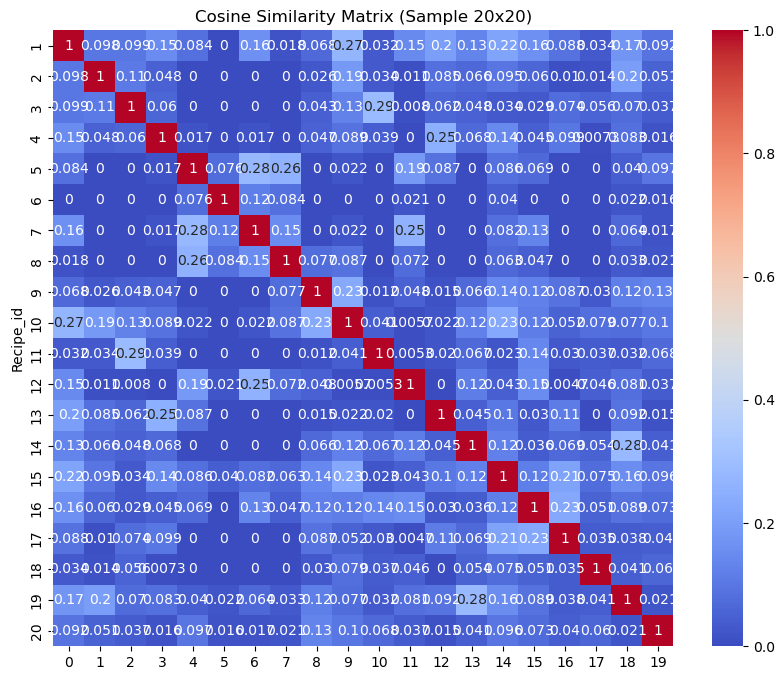

In [537]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df.iloc[:20, :20], annot=True, cmap='coolwarm')
plt.title('Cosine Similarity Matrix (Sample 20x20)')
plt.show()


### Step 4: Generating Recommendations
To recommend recipes for a given user, find recipes similar to the recipes the user has rated highly.

In [544]:
# Function to find most similar recipes
def get_similar_recipes(recipe_id, cosine_sim, df, num_recipes=5):
    # Get the index of the recipe that matches the recipe_id
    if recipe_id not in df.index:
        raise ValueError(f"Recipe_id {recipe_id} is not in the recipe dataset.")
    
    idx = df.index.get_loc(recipe_id)
    
    # Get the pairwise similarity scores of all recipes with that recipe
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the recipes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores for the most similar recipes
    sim_scores = sim_scores[1:num_recipes+1]
    
    # Get the recipe indices
    recipe_indices = [i[0] for i in sim_scores]
    
    # Return the top 'num_recipes' most similar recipes
    return df.iloc[recipe_indices]

similar_recipes = get_similar_recipes(3, cosine_sim, df)
similar_recipes

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
Recipe_id,,,,,
6467,Southern Mac and Cheese,"['8 ounces (2 cups) elbow macaroni', 'Kosher salt', '3 tablespoons unsalted butter', '3 tablespo...","Preheat oven to 350°F. Cook macaroni in a large pot of boiling salted water, stirring occasional...",southern-mac-and-cheese-388717,"salt, paprika, black pepper, flour, macaroni, cheese, mustard, milk, parmesan, purpose, unsalted..."
6864,Carroty Mac and Cheese,"['2 cups whole wheat macaroni', '2 1/2 cups coarsely grated carrot (about 8 small)', '3 cups gra...",1. Preheat oven to 400°F and grease an 8-inch square baking pan. Arrange a rack in the top third...,carroty-mac-and-cheese-367160,"salt, black pepper, cheese, macaroni, mustard, carrot, milk, cheddar, pieces, wheat, stick, coar..."
2497,Slow-Cooker Macaroni and Cheese,"['1 1/2 cups skim or low-fat milk', '1 (15-ounce) can evaporated skim milk', '1 large egg, beate...",Coat a 3- to 4 1/2-quart slow cooker with nonstick cooking spray. Combine the low-fat and evapor...,slow-cooker-macaroni-and-cheese,"skim, salt, tillamook, vermont, black pepper, cheese, macaroni, egg, oregon, colby, milk, chedda..."
1551,Macaroni & Cheese for a Crowd,"['1 box (16 oz.) dry, small elbow macaroni, cooked and drained', '1/4 cup cornstarch', '2 teaspo...",Preheat oven to 375°F. Grease 13x9-inch baking dish or disposable baking pan.\nCombine cornstarc...,macaroni-and-cheese-for-a-crowd,"ground, , milk, jack, butter, pepper, ®, cans, box, black pepper, fl, elbow, carnation, paprika..."
1464,Instant Pot Macaroni and Cheese,"['1 pound elbow macaroni', '4 cups low-sodium chicken broth or vegetable broth', '3 tablespoons ...","Combine the macaroni, broth, and butter in the Instant Pot. Secure the lid and set the Pressure ...",instant-pot-macaroni-and-cheese,"broth, cheese, macaroni, pepper, chicken, cheddar, parmesan, cream, unsalted butter, mustard, ve..."


The above code displays the similar recipes with the same 

### Step 5: Evaluation
Evaluate the performance of the content-based filtering system by checking if the recommendations are sensible and relevant. For a more formal evaluation, consider methods like precision at k, recall, or F1-score, based on a hold-out validation set or via cross-validation.

Content-based filtering provides personalized recommendations by analyzing item features. In this setup, recipes are compared based on textual descriptions (ingredients, dish type), but you can easily extend this by incorporating additional features such as cuisine, preparation method, or nutritional content. The model's effectiveness hinges on the richness and accuracy of the feature extraction phase, making thorough preprocessing crucial. This approach not only enhances user experience by providing tailored suggestions but also helps to explore a wider variety of recipes that share similar characteristics with those they have already enjoyed.

In [576]:
# defining a function for getting recommendations
def get_recommendations(recipe_id, cosine_sim_df, df, top_n=5):
    # Checking if the recipe ID exists in the DataFrame
    if recipe_id not in cosine_sim_df.index:
        return f"Recipe ID {recipe_id} not found in the dataset. Available IDs: {list(cosine_sim_df.index)}"
    
    # Get similarity scores and sort them
    sim_scores = cosine_sim_df.loc[recipe_id]
    sim_scores = sim_scores.sort_values(ascending=False)
    
    # Get top N similar recipe indices
    top_recipes_indices = sim_scores.iloc[1:top_n+1].index  # Exclude self-comparison
    
    # Return the top N similar recipe titles
    return df.loc[top_recipes_indices, 'Title']

# Example usage
try:
    recommendations = get_recommendations(11, cosine_sim_df, df, top_n=3)
    print(recommendations)
except Exception as e:
    print(f"An error occurred: {e}")


Recipe_id
2262                 Five-Cheese Pimento Cheese
11346    Chipotle-White Cheddar Mashed Potatoes
2241                  3-Ingredient Cheese Sauce
Name: Title, dtype: object


In [578]:
similarities = cosine_sim[0]  # Get similarity scores for the first item with all items
recommended_item_indices = np.argsort(-similarities)[1:4]  # Indices of top 3 similar items, excluding the item itself

print(f"Recommended items for item 0: {recommended_item_indices}")

Recommended items for item 0: [11651  3277  3330]


In [583]:
df['Cleaned_Ingredients'].iloc[2262] # Details of the most similar item

'ground, onion, thinly, wine, black pepper, honey, yukon, jalapeño, bone, potatoes, baby, skin, chicken, vinegar, salt, cabbage, olive oil, cumin, thighs, gold, mint'

In [582]:
df['Cleaned_Ingredients'].iloc[11346]  # Details of the second most similar item

'salt, semolina, water, ground, time, flour, cheese, pepper, milk, parmesan, unsalted butter, spinach, package, nutmeg, pasta, eggs'

In [580]:
df['Cleaned_Ingredients'].iloc[2241] # Details of the third most similar item

'potatoes, lightly, salt, cracklings, meal,  , onions, black pepper, poultry, schmaltz, flour, gribenes, carrot, matza, purpose, vegetable oil, eggs, russet'

This process leverages the computed cosine similarities to guide recommendations, ensuring that recommended items are textually similar to the item of interest, based on their descriptions or other textual features processed through TF-IDF and n-grams.

In [624]:
import requests

api_key = "pMLeIW9BhKSckb6M7KvdgqGkhn7anXQ7YoWS8fwP"

def fetch_nutritional_info(ingredient):
    search_url = "https://api.nal.usda.gov/fdc/v1/foods/search"
    api_key = "pMLeIW9BhKSckb6M7KvdgqGkhn7anXQ7YoWS8fwP"

    params = {
        "query": ingredient,
        "api_key": api_key,
        "pageSize": 2  # Adjust based on how broad you want the search to be
    }
    response = requests.get(search_url, params=params)
    data = response.json()

   # Initialize default nutritional info; adjust as per your requirements
    nutrition_info = {"Recipe":0, "calories": 0, "protein": 0, "carbohydrates": 0, "fiber": 0, "sugar": 0, "sodium": 0, "fat":0}

    if 'foods' in data and len(data['foods']) > 0:
        fdc_id = data['foods'][0]['fdcId']
        
        # Fetching detailed food information
        details_url = f"https://api.nal.usda.gov/fdc/v1/food/{fdc_id}"
        details_response = requests.get(details_url, {"api_key": api_key})
        details_data = details_response.json()

        # Extracting nutritional information
        for nutrient in details_data['foodNutrients']:
            if nutrient['nutrient']['name'] == 'Energy':
                nutrition_info["calories"] = nutrient.get('amount', 0)  # Use 'amount' instead of 'value'
            elif nutrient['nutrient']['name'] == 'Protein':
                nutrition_info["protein"] = nutrient.get('amount', 0)  # Use 'amount' instead of 'value'
            elif nutrient['nutrient']['name'] == 'Carbohydrate, by difference':
                nutrition_info["carbohydrates"] = nutrient.get('amount', 0)
            elif nutrient['nutrient']['name'] == 'Fiber, total dietary':
                nutrition_info["fiber"] = nutrient.get('amount', 0)
            elif nutrient['nutrient']['name'] == 'Sugars, total including NLEA':
                nutrition_info["sugar"] = nutrient.get('amount', 0)
            elif nutrient['nutrient']['name'] == 'Sodium, Na':
                nutrition_info["sodium"] = nutrient.get('amount', 0)   
            elif nutrient['nutrient']['name'] == 'Total lipid (fat)':
                nutrition_info["fat"] = nutrient.get('amount', 0)  
    return nutrition_info



In [627]:
import pandas as pd

# Initialize an empty list to store the data
nutrition_data = []

# Iterate over the first 50 rows in the DataFrame
for index, row in df.head(100).iterrows():
    # Fetch the title and cleaned ingredient for the current row
    title = row['Title']
    ingredient = row['Cleaned_Ingredients']
    
    # Call fetch_nutritional_info() for the ingredient
    nutritional_info = fetch_nutritional_info(ingredient)
    
    # Preprocess the nutritional information dictionary
    processed_info = {
        'Recipe': title,
        'Calories': nutritional_info.get('calories', 0),
        'Protein': nutritional_info.get('protein', 0),
        'Carbohydrates': nutritional_info.get('carbohydrates', 0),
        'Fiber': nutritional_info.get('fiber', 0),
        'Sugar': nutritional_info.get('sugar', 0),
        'Sodium': nutritional_info.get('sodium', 0), # Add sodium if available
        'Fat': nutritional_info.get('fat', 0)
    }
    
    # Append the processed nutritional information to the list
    nutrition_data.append(processed_info)

# Create a DataFrame from the list of nutritional data
nutrition_df = pd.DataFrame(nutrition_data)

# Now nutrition_df contains the nutritional information for the first 50 items with each nutrient in a separate column



In [628]:
nutrition_df

,Recipe,Calories,Protein,Carbohydrates,Fiber,Sugar,Sodium,Fat
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,13.0,0.00,2.67,0.0,0.00,0.0,0.00
1,Crispy Salt and Pepper Potatoes,423.0,5.56,24.45,14.0,0.00,9.0,1.68
2,Thanksgiving Mac and Cheese,316.0,12.24,44.90,2.0,0.00,888.0,10.20
3,Italian Sausage and Bread Stuffing,230.0,20.00,13.30,0.0,0.76,417.0,10.70
4,Newton's Law,180.0,0.40,10.10,0.0,0.00,3.0,0.20
...,...,...,...,...,...,...,...,...
95,Corn and Chickpea Bowls With Miso Tahini,857.0,0.00,0.00,0.0,0.00,0.0,100.00
96,Stone Fruit Custard Tart,1205.0,0.06,12.65,0.0,0.00,9.0,0.06
97,Plátanos Horneados con Crema y Queso (Baked Banana With Crema and Cheese),299.0,18.10,2.98,0.0,2.32,751.0,23.80
98,Tamale Pie with Fresh Tomato and Corn,1237.0,13.63,3.78,0.0,0.00,788.0,25.10


To suggest recipes based on their nutritional values and categorize them into different health-related categories such as "Foods to Eat", "Foods to Avoid", "High Protein", "Healthy Foods", and "Diabetic Friendly", We have to create a set of criteria for each category. These criteria will help classify the recipes based on their nutritional content.

In [629]:
def categorize_recipe(nutrition_info):
    categories = []

    # High Protein Foods (more than 20g of protein)
    if nutrition_info['Protein'] > 20:
        categories.append('High Protein')

    # Healthy Foods (Low in sodium and sugar, high in fiber)
    if nutrition_info['Sodium'] < 400 and nutrition_info['Sugar'] < 5 and nutrition_info['Fiber'] > 5:
        categories.append('Healthy Foods')

    # Diabetic Friendly (Low in sugar and carbohydrates)
    if nutrition_info['Sugar'] < 5 and nutrition_info['Carbohydrates'] < 20:
        categories.append('Diabetic Friendly')

    # Foods to Eat (Low in calories and sodium)
    if nutrition_info['Calories'] < 500 and nutrition_info['Sodium'] < 500:
        categories.append('Foods to Eat')

    # Foods to Avoid (High in sodium or sugar)
    if nutrition_info['Sodium'] > 600 or nutrition_info['Sugar'] > 20:
        categories.append('Foods to Avoid')

    # Fat Free Foods (Less than 0.5 grams of fat)
    if nutrition_info['Fat'] < 0.5:
        categories.append('Fat Free Foods')

    return categories


In [630]:
# Apply categorization function to each row
nutrition_df['Categories'] = nutrition_df.apply(categorize_recipe, axis=1)

# Display the DataFrame with new categories
nutrition_df[['Recipe', 'Categories']].head()


,Recipe,Categories
0,Miso-Butter Roast Chicken With Acorn Squash Panzanella,"[Diabetic Friendly, Foods to Eat, Fat Free Foods]"
1,Crispy Salt and Pepper Potatoes,"[Healthy Foods, Foods to Eat]"
2,Thanksgiving Mac and Cheese,[Foods to Avoid]
3,Italian Sausage and Bread Stuffing,"[Diabetic Friendly, Foods to Eat]"
4,Newton's Law,"[Diabetic Friendly, Foods to Eat, Fat Free Foods]"


In [591]:
# Filter for Healthy Foods
healthy_foods = nutrition_df[nutrition_df['Categories'].apply(lambda x: 'Healthy Foods' in x)]
healthy_foods


,Recipe,Calories,Protein,Carbohydrates,Fiber,Sugar,Sodium,Categories
1,Crispy Salt and Pepper Potatoes,423.0,5.56,24.45,14.0,0.0,9.0,"[Healthy Foods, Foods to Eat]"


In [592]:
# Function to get recommendations based on category
def get_category_recommendations(category, top_n=5):
    filtered_recipes = nutrition_df[nutrition_df['Categories'].apply(lambda x: category in x)]
    return filtered_recipes.head(top_n)['Recipe']

# Example usage: Get top 5 Diabetic Friendly Foods
print(get_category_recommendations('Diabetic Friendly', top_n=5))


0    Miso-Butter Roast Chicken With Acorn Squash Panzanella
3                        Italian Sausage and Bread Stuffing
4                                              Newton's Law
5                                              Warm Comfort
6                                        Apples and Oranges
Name: Recipe, dtype: object


This approach allows us to leverage detailed nutritional information to make practical and tailored recipe recommendations based on dietary needs or health goals. It makes your application more useful and interactive for users who are conscious about their dietary intake. By adjusting the thresholds and definitions of categories according to dietary guidelines or nutritional advice as necessary to suit our target audience or specific health considerations.

In [631]:
# Assuming 'nutrition_df' has a 'Categories' column with lists of categories
nutrition_df_exploded = nutrition_df.explode('Categories')

def display_food_recommendations(nutrition_df, num_categories=3, num_recommendations=5):
    color_palette = ["#FFB6C1", "#ADD8E6", "#90EE90", "#FFA07A", "#20B2AA", "#778899", "#DAA520"]
    color_cycle = cycle(color_palette)
    
    html_str = "<div style='width: 100%;'>"
    categories = nutrition_df['Categories'].unique()  # This should work now with no lists in 'Categories'
    
    for category in categories:
        category_color = next(color_cycle)  # Cycle through colors for each category
        recommendations = nutrition_df[nutrition_df['Categories'] == category].sample(n=min(num_recommendations, len(nutrition_df[nutrition_df['Categories'] == category]))).loc[:,'Recipe'].tolist()
        
        html_str += f"<h2>{category}</h2><div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
        for recommendation in recommendations:
            html_str += f"<div style='min-width: 150px; padding: 10px; background-color: {category_color}; color: #000; text-align: center; border-radius: 10px;'>{recommendation}</div>"
        html_str += "</div><br>"
    
    html_str += "</div>"
    display(HTML(html_str))

# Displaying the categorized food recommendations
display_food_recommendations(nutrition_df_exploded)


## Limitations

1. Data Dependence:
The accuracy of recommendations heavily depends on the quality and comprehensiveness of the nutritional data. Inaccuracies in data or incomplete entries can lead to suboptimal recommendations. <br>

2. Generalization Challenges:
Categorizing foods into broad groups like 'Healthy Foods' or 'Foods to Avoid' may not account for individual nutritional needs or medical conditions. Personalized nutrition is complex and varies significantly from person to person. <br>

3. Nutritional Information Gaps:
Not all recipes or ingredients have detailed nutritional information available, which can limit the system's ability to provide recommendations for certain dishes.

## Conclusion

Throughout this project, we have developed a Nutritional Food Recommender System that leverages comprehensive nutritional data to categorize and recommend recipes based on specific dietary needs and preferences. The system integrates nutritional information fetched from the USDA FoodData Central API, providing detailed insights into the calorie, protein, carbohydrate, fiber, sugar, sodium, and fat content of various recipes.

Our approach involved preprocessing recipe data, extracting and processing nutritional information, and categorizing recipes into groups such as High Protein Foods, Healthy Foods, Diabetic Friendly Foods, Low Fat Foods, Fat Free Foods, and Foods to Avoid. This categorization allows users to make informed dietary choices that align with their health goals, such as managing diabetes, adhering to low-fat diets, or simply maintaining a balanced diet.

In conclusion, the personalized food recommender system represents a convergence of technology, nutrition, and user-centric design, aiming to revolutionize the way individuals approach diet and health. Through its implementation, the project seeks to make personalized dietary advice accessible and actionable, supporting a healthier and more informed society.

This project plan sets the stage for detailed planning, development, and execution phases, where each objective will be systematically addressed to realize the vision of a comprehensive and user-friendly food recommender system.

## Future Directions

1. Web Development Integration:
Interactive Web Interface: Develop a user-friendly web interface using frameworks like Flask or Django that allows users to input their dietary preferences and view recommended recipes. This interface can include filters based on nutritional content and categories.
Real-Time Nutritional Analysis: Implement features that allow users to input custom recipes and get real-time nutritional analysis and categorization based on the ingredients listed.
User Profile Customization: Integrate user profiles that can store dietary preferences, past selections, and recommended recipes for personalized suggestions.

2. Expansion of Recipe Database:
Global Cuisine Support: Expand the database to include a wider variety of global cuisines, providing users with diverse dietary options.
Seasonal and Localized Recommendations: Implement features that suggest recipes based on the seasonality of ingredients and local availability, promoting fresh and sustainable eating habits.

3. Integration with Health Apps:
Sync with Fitness Apps: Allow the system to sync with fitness and health tracking apps to recommend recipes based on the user's health data, such as daily calorie consumption, activity level, and health goals.
Meal Planning Tools: Develop comprehensive meal planning tools that suggest weekly or monthly meal plans based on nutritional goals and user preferences.

## References
Here are the references and data sources used in this project:

1. USDA FoodData Central API: Used for fetching detailed nutritional information about ingredients. FoodData Central

2. Python Documentation: For understanding and using Python libraries such as Requests, Pandas, and NumPy. Python Docs

3. https://towardsdatascience.com/building-a-food-recommendation-system-90788f78691a

4. https://github.com/kulwinderkk/recipe_recommender_nlp?tab=readme-ov-file